In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
pName = pd.read_csv("papername.csv")
metrics = pd.read_csv("metrics.csv")
FS = pd.read_csv("FS.csv")
performance = pd.read_csv("performance.csv")
datasets = pd.read_csv("datasets.csv")
pName_FS = pd.read_csv("pName_FS.csv")
classifier = pd.read_csv("classifier.csv")
pName_classifier = pd.read_csv("pName_classifier.csv")
pName_datasets = pd.read_csv("pName_datasets.csv")
pName_metrics = pd.read_csv("pName_metrics.csv")
pName_performance = pd.read_csv("pName_performance.csv")

In [26]:
# 论文库数量统计
paper_count = pName["ID"].count()
paper_count

118

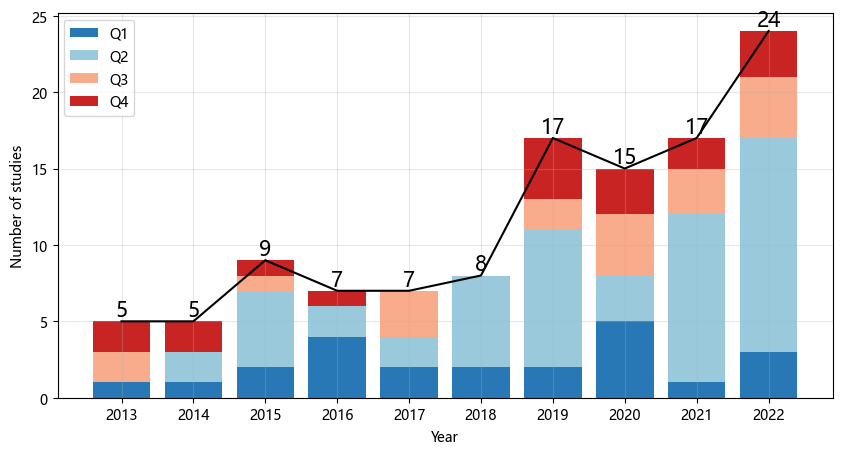

In [27]:
# 调查论文年及区分布
# JCR分区
JCR = []
for year in range(2013,2023):
    count1 = pName[(pName["Publication Year"]==year) & (pName["JCR"]==1)]["ID"].count()
    count2 = pName[(pName["Publication Year"]==year) & (pName["JCR"]==2)]["ID"].count()
    count3 = pName[(pName["Publication Year"]==year) & (pName["JCR"]==3)]["ID"].count()
    count4 = pName[(pName["Publication Year"]==year) & (pName["JCR"]==4)]["ID"].count()
    JCR.append([count1, count2, count3 ,count4])
JCR = pd.DataFrame(JCR, columns=["Q1", "Q2", "Q3", "Q4"])
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(2013,2023), JCR["Q1"], label="Q1", color="#2878b5")
plt.bar(range(2013,2023), JCR["Q2"], bottom=JCR["Q1"], label="Q2", color="#9ac9db")
plt.bar(range(2013,2023), JCR["Q3"], bottom=JCR["Q1"]+JCR["Q2"], label="Q3", color="#f8ac8c")
plt.bar(range(2013,2023), JCR["Q4"], bottom=JCR["Q1"]+JCR["Q2"]+JCR["Q3"], label="Q4", color="#c82423")
plt.plot(range(2013,2023), JCR.sum(axis=1), color="k")
for a, b in zip(range(2013,2023), JCR.sum(axis=1)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of studies')
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(range(2013,2023))
plt.savefig("fig1.pdf")

([<matplotlib.axis.XTick at 0x196252b7400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

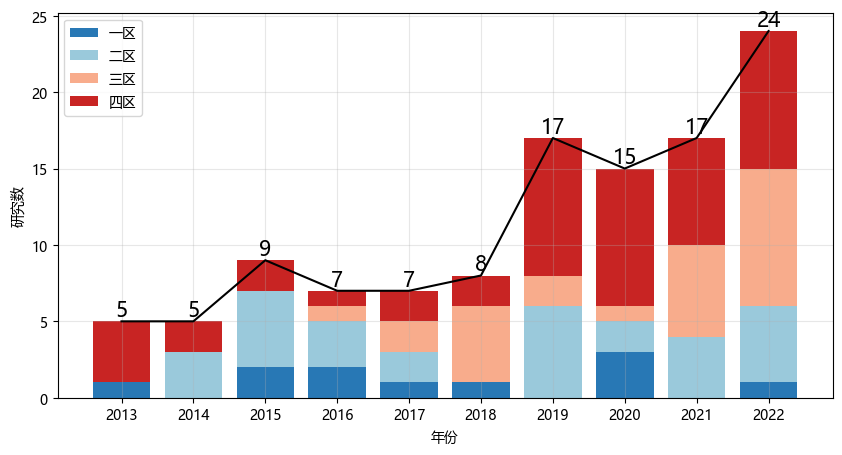

In [28]:
# 中科院分区
CAS = []
for year in range(2013,2023):
    count1 = pName[(pName["Publication Year"]==year) & (pName["CAS"]==1)]["ID"].count()
    count2 = pName[(pName["Publication Year"]==year) & (pName["CAS"]==2)]["ID"].count()
    count3 = pName[(pName["Publication Year"]==year) & (pName["CAS"]==3)]["ID"].count()
    count4 = pName[(pName["Publication Year"]==year) & (pName["CAS"]==4)]["ID"].count()
    CAS.append([count1, count2, count3 ,count4])
CAS = pd.DataFrame(CAS, columns=["一区", "二区", "三区", "四区"])
CR = pd.DataFrame(CAS, columns=["Q1", "Q2", "Q3", "Q4"])
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(2013,2023), CAS["一区"], label="一区", color="#2878b5")
plt.bar(range(2013,2023), CAS["二区"], bottom=CAS["一区"], label="二区", color="#9ac9db")
plt.bar(range(2013,2023), CAS["三区"], bottom=CAS["一区"]+CAS["二区"], label="三区", color="#f8ac8c")
plt.bar(range(2013,2023), CAS["四区"], bottom=CAS["一区"]+CAS["二区"]+CAS["三区"], label="四区", color="#c82423")
plt.plot(range(2013,2023), CAS.sum(axis=1), color="k")
for a, b in zip(range(2013,2023), CAS.sum(axis=1)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
plt.xlabel('年份')
plt.ylabel('研究数')
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(range(2013,2023))
# plt.savefig("中科院分区.jpg")

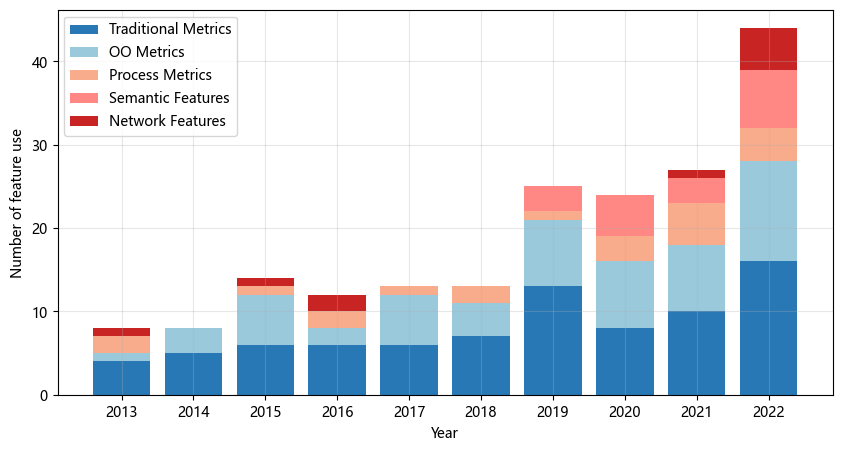

In [29]:
# 开始统计度量，度量与年份的关系
paper_metrics = pd.merge(pd.merge(pName, pName_metrics, on="ID"), metrics, on="mID")
paper_metrics.to_csv('paper_metrics.csv', index=False)
df1 = pd.DataFrame()
for i in list(set(paper_metrics["ID"])):
    ca_temp = paper_metrics[(paper_metrics["ID"] == i)].drop_duplicates("category")
    df1 = pd.concat([df1,ca_temp])
traditional = []
process = []
oo =[]
network = []
semantic = []

for year in range(2013,2023):
    traditional.append(df1[(df1["Publication Year"] == year) & (df1["category"] == "traditional")]["category"].count())
    process.append(df1[(df1["Publication Year"] == year) & (df1["category"] == "Process")]["category"].count())
    oo.append(df1[(df1["Publication Year"] == year) & (df1["category"] == "OO")]["category"].count())
    network.append(df1[(df1["Publication Year"] == year) & (df1["category"] == "network")]["category"].count())
    semantic.append(df1[(df1["Publication Year"] == year) & (df1["category"] == "semantic")]["category"].count())

plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(2013,2023), traditional, label = "Traditional Metrics", color="#2878b5")
plt.bar(range(2013,2023), oo, bottom=traditional, label = "OO Metrics", color="#9ac9db")
plt.bar(range(2013,2023), process, bottom=np.array(traditional)+np.array(oo), label = "Process Metrics", color="#f8ac8c")
plt.bar(range(2013,2023), semantic, bottom=np.array(traditional)+np.array(oo)+np.array(process), label="Semantic Features", color="#ff8884")
plt.bar(range(2013,2023), network, bottom=np.array(traditional)+np.array(oo)+np.array(process)+np.array(semantic), label="Network Features", color="#c82423")
plt.legend()
plt.xticks(range(2013,2023))
# plt.ylim(0,35)
plt.xlabel('Year')
plt.ylabel('Number of feature use')
plt.grid(alpha=0.3)
plt.savefig("fig2a.pdf")
# df1 = paper_metrics.groupby('category')["ID"].count()
# df1 = df1[df1 > 5]
# df1 = df1.sort_values(ascending=False)
# plt.bar(df1.index[:20], df1[:20])
# plt.xticks(rotation=90)

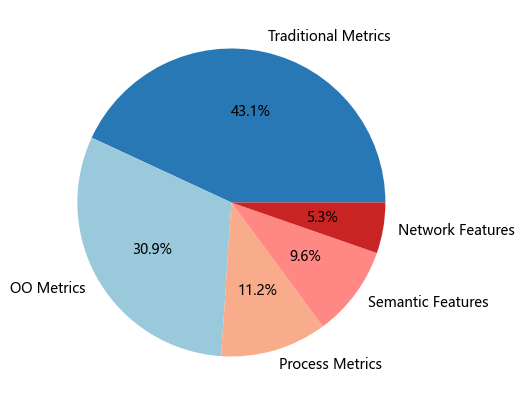

In [30]:
plt.figure(figsize=(5, 5), dpi=100)
pie_data = np.array([sum(traditional), sum(oo), sum(process), sum(semantic), sum(network)])/(sum(traditional)+sum(oo)+sum(process)+sum(semantic)+sum(network))*100
plt.pie(pie_data,labels=["Traditional Metrics","OO Metrics","Process Metrics","Semantic Features", "Network Features"], colors=["#2878b5", "#9ac9db", "#f8ac8c", "#ff8884", "#c82423"], autopct='%.1f%%')
plt.savefig("fig2b.pdf")

In [31]:
# 预测场景
intra_release = []
inter_release = []
cross_project = []

for year in range(2013,2023):
    year_temp = pName[(pName["Publication Year"] == year)]
    count1 = 0
    count2 = 0
    count3 = 0
    for i in year_temp.index:
        if year_temp.loc[i,'prediction type'].find('Intra-release') != -1:
            count1 = count1 + 1
        if year_temp.loc[i,'prediction type'].find('Inter-release') != -1:
            count2 = count2 + 1
        if year_temp.loc[i,'prediction type'].find('Cross-project') != -1:
            count3 = count3 + 1
    intra_release.append(count1)
    inter_release.append(count2)
    cross_project.append(count3)

# prediction_type = pd.DataFrame([inter_release, inter_release, cross_project], index=["intra_release", "inter_release", "cross_project"], columns=range(2013,2023))
prediction_type = pd.DataFrame({"版本内":intra_release, "跨版本":inter_release, "跨项目":cross_project}, index=range(2013,2023))

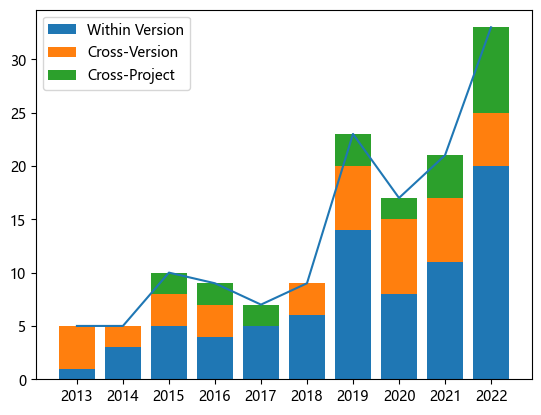

<Figure size 1000x500 with 0 Axes>

In [32]:

fig, ax = plt.subplots()
plt.figure(figsize=(10, 5), dpi=100)
ax.bar(prediction_type.index, intra_release, label="Within Version")
ax.bar(prediction_type.index, inter_release, bottom=intra_release, label="Cross-Version")
ax.bar(prediction_type.index, cross_project, bottom=[intra_release[i] + inter_release[i] for i in range(len(intra_release))], label="Cross-Project")
ax.plot(range(2013,2023), [intra_release[i] + inter_release[i] + cross_project[i] for i in range(len(intra_release))])
ax.set_xticks(range(2013,2023), rotation=0)
ax.legend()
plt.show()

In [33]:
pName.groupby('prediction type')["ID"].count()

prediction type
Cross-project                                 4
Cross-project(Cross-company)                  1
Inter-release                                21
Inter-release/Cross-project                  12
Intra-release                                69
Intra-release/Cross-project                   4
Intra-release/Inter-release                   4
Intra-release/Inter-release/Cross-project     3
Name: ID, dtype: int64

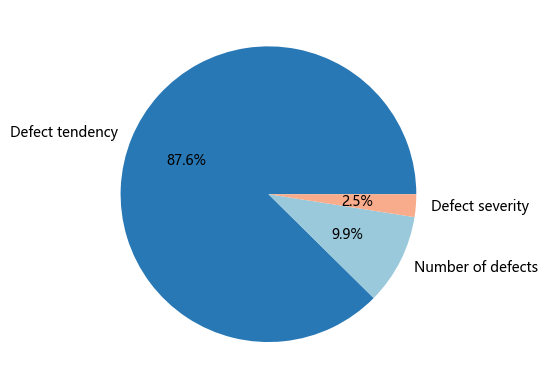

In [34]:
count1 = pName.loc[(pName["dependency"].str.contains("defect-prone"))]["ID"].count()
count2 = pName.loc[(pName["dependency"].str.contains("defect-number"))]["ID"].count()
count3 = pName.loc[(pName["dependency"].str.contains("defect-severity"))]["ID"].count()
total = count1+count2+count3
dependent = np.array([count1, count2, count3])/total*100
plt.pie(dependent,labels=["Defect tendency", "Number of defects", "Defect severity"],colors=["#2878b5", "#9ac9db", "#f8ac8c"], autopct='%.1f%%')
plt.savefig("fig6.pdf")

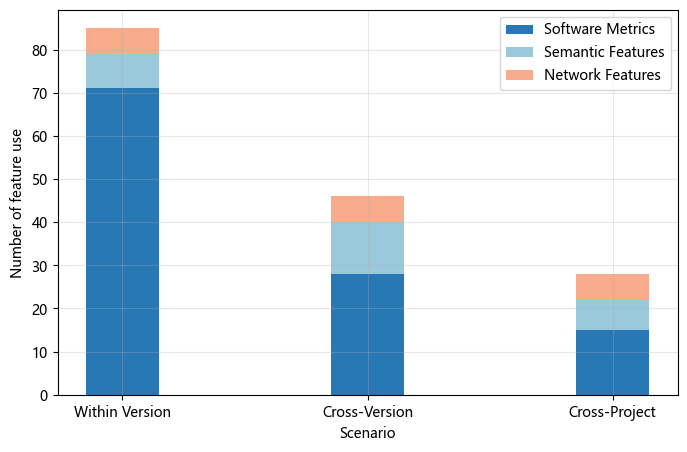

In [35]:
p_type = ["Intra-release", "Inter-release", "Cross-project"]
df2 = []
df_singlemetrcis = df1.replace({"traditional":"metrics", "Process":"metrics", "OO":"metrics"})
for p in p_type:
    count1 = df_singlemetrcis.loc[(df_singlemetrcis["prediction type"].str.contains(p)) & (df_singlemetrcis["category"] == "metrics")].drop_duplicates("ID")["ID"].count()
    count2 = df1.loc[(df1["prediction type"].str.contains(p)) & (df1["category"] == "semantic")]["ID"].count()
    count3 = df1.loc[(df1["prediction type"].str.contains(p)) & (df1["category"] == "network")]["ID"].count()
    df2.append([count1, count2, count3])
df2 = pd.DataFrame(df2, columns=["软件度量", "语义特征", "网络特征"])
x = np.arange(3)
width = 0.3
plt.figure(figsize=(8, 5), dpi=100)
plt.bar(x, df2["软件度量"], width, label="Software Metrics", color="#2878b5")
plt.bar(x, df2["语义特征"], width, bottom=df2["软件度量"], label='Semantic Features', color="#9ac9db")
plt.bar(x, df2["网络特征"], width, bottom=np.array(df2["软件度量"])+np.array(df2["语义特征"]), label='Network Features', color="#f8ac8c")
plt.xticks(range(3), labels=["Within Version", "Cross-Version", "Cross-Project"])

plt.xlabel('Scenario')
plt.ylabel('Number of feature use')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("fig5.pdf")

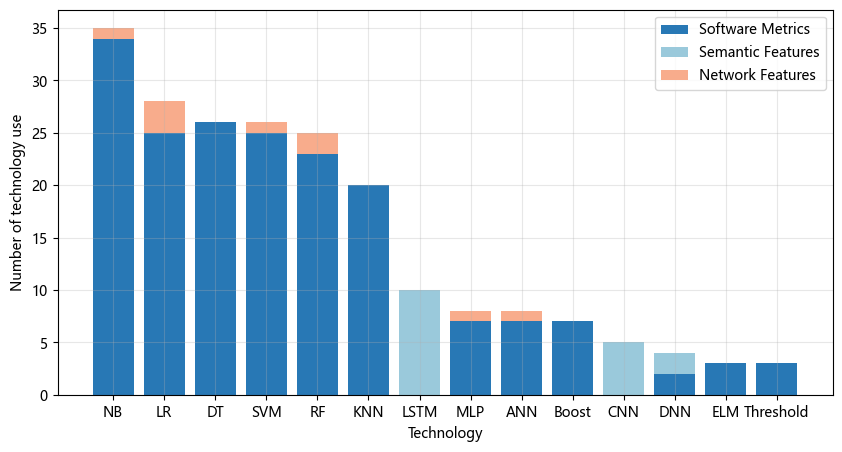

In [36]:
# 计算分类器和度量关系
plt.figure(figsize=(10, 5), dpi=100)
df3 = pd.DataFrame()
df3 = pd.concat([df3, df_singlemetrcis[df_singlemetrcis["category"] == "metrics"].drop_duplicates("ID")])
df3 = pd.concat([df3, df_singlemetrcis[df_singlemetrcis["category"] == "semantic"].drop_duplicates("ID")])
df3 = pd.concat([df3, df_singlemetrcis[df_singlemetrcis["category"] == "network"].drop_duplicates("ID")])
paper_classifier = pd.merge(pd.merge(pName, pName_classifier, on="ID"), classifier, on="tID")
technology_list = list(set(paper_classifier["classifier"]))

c_count_total=[]
for i in technology_list:
    c_count_total.append(paper_classifier[paper_classifier["classifier"] == i]["ID"].count())
c_total = pd.DataFrame(c_count_total, index=technology_list)
c_total = c_total.sort_values(by=0, ascending=False)
c_total = c_total[:15]
technology_list = list(c_total.index)
technology_list.remove("others")

c_count = []
for i in technology_list:
    c_count.append(paper_classifier[(paper_classifier["category"] == "metrics") & (paper_classifier["classifier"] == i)]["ID"].count())
c_dict = dict(zip(classifier["classifier"], classifier["chinese name"]))  # 中文字典这里


c_count1 = []
# semantic_list = list(set(paper_classifier[paper_classifier["category"] == "semantic"]["classifier"]))
for i in technology_list:
    c_count1.append(paper_classifier[(paper_classifier["category"] == "semantic") & (paper_classifier["classifier"] == i)]["ID"].count())

c_count2 = []
# metrics_list = list(set(paper_classifier[paper_classifier["category"] == "network"]["classifier"]))
for i in technology_list:
    c_count2.append(paper_classifier[(paper_classifier["category"] == "network") & (paper_classifier["classifier"] == i)]["ID"].count())

plt.bar(technology_list, c_count, color="#2878b5", label="Software Metrics")
plt.bar(technology_list, c_count1, bottom=np.array(c_count),color="#9ac9db", label="Semantic Features")
plt.bar(technology_list, c_count2, bottom=np.array(c_count) + np.array(c_count1), color="#f8ac8c", label="Network Features")

plt.legend()
plt.grid(alpha=0.3)
plt.xlabel('Technology')
plt.ylabel('Number of technology use')
plt.savefig("fig9.pdf")

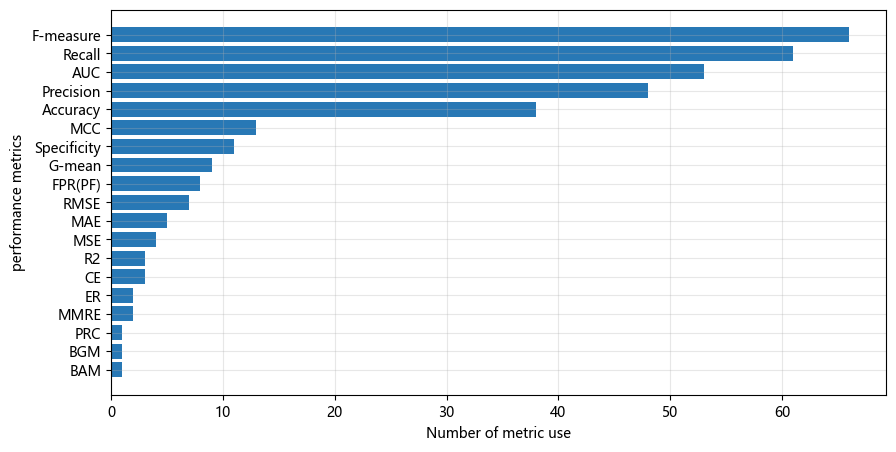

In [37]:
# 计算评价指标
for i in performance["pID"]:
    p_count = pName_performance[pName_performance["pID"] == i]["ID"].count()
    performance.loc[performance[performance["pID"] == i].index, "num"] = p_count
p_change = performance
p_change.loc[p_change[p_change["performance metrics"] == "Recall"].index, "num"] = int(p_change[p_change["performance metrics"] == "PD(Probability of Detection)"]["num"]) + int(p_change[p_change["performance metrics"] == "sensitivity"]["num"]) + int(p_change[p_change["performance metrics"] == "Recall"]["num"])
p_change = p_change.drop(p_change[p_change["performance metrics"] == "PD(Probability of Detection)"].index)
p_change = p_change.drop(p_change[p_change["performance metrics"] == "sensitivity"].index).drop(p_change[p_change["performance metrics"] == "HV"].index).drop(p_change[p_change["performance metrics"] == "Cost"].index).drop(p_change[p_change["performance metrics"] == "FPA"].index)
p_change = p_change.drop(p_change[p_change["performance metrics"] == "Cost"].index)
p_change = p_change.sort_values(by="num", ascending=True)
# P_dict = dict(zip(performance["performance metrics"], performance["chinese name"]))
plt.figure(figsize=(10, 5), dpi=100)
plt.grid(alpha=0.3)
plt.barh(p_change["performance metrics"], p_change["num"], color="#2878b5")
plt.xlabel('Number of metric use')
plt.ylabel('performance metrics')
plt.savefig("fig10.pdf")

Text(0, 0.5, 'performance metrics')

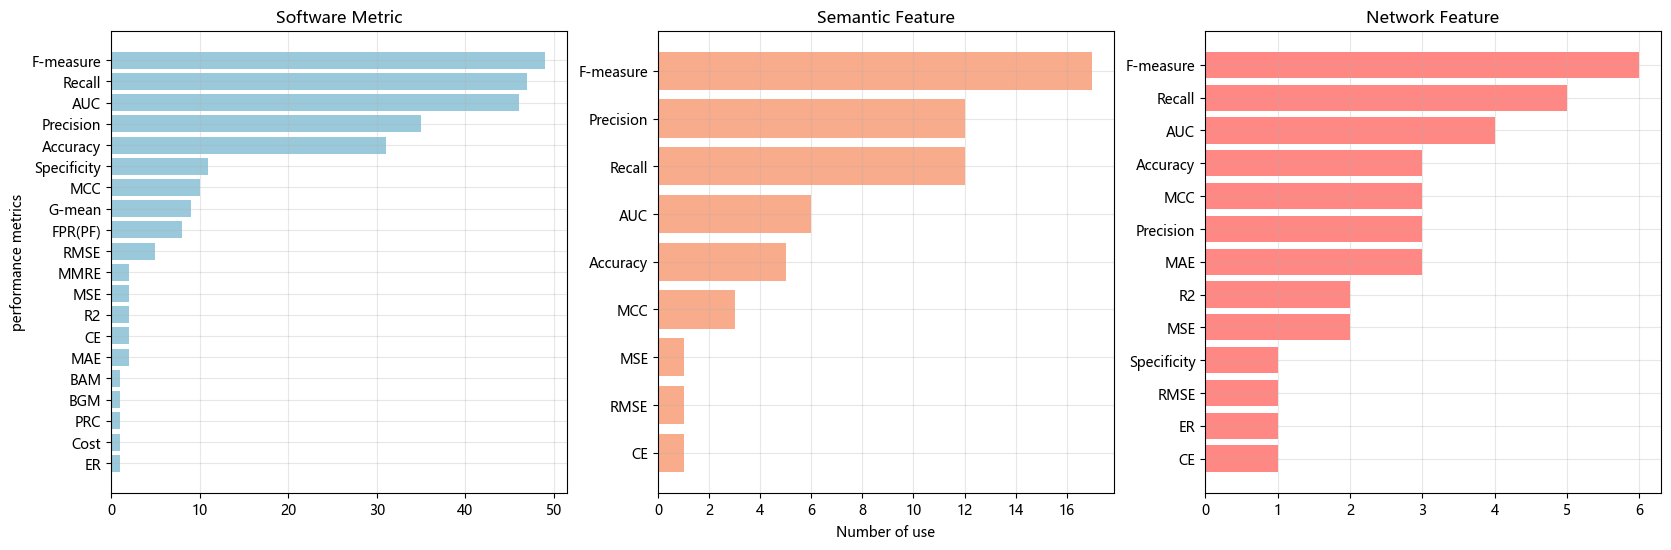

In [38]:
# 特征与性能指标关系
paper_performance = pd.merge(pd.merge(df3, pName_performance, on="ID"), performance, on="pID")
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for feature, i, c in zip(["metrics", "semantic", "network"], [0, 1, 2], ["#9ac9db", "#f8ac8c", "#ff8884"]):
    p_list = []
    performance_list = list(set(paper_performance[paper_performance["category"] == feature]["performance metrics"]))
    for p in performance_list:
        p_count = paper_performance[(paper_performance["category"] == feature) & (paper_performance["performance metrics"] == p)]["ID"].count()
        p_list.append([p, p_count])
    df4 = pd.DataFrame(p_list, columns=["name", "num"])
    if df4["name"].isin(["PD(Probability of Detection)"]).any():
        df4.loc[df4[df4["name"] == "Recall"].index, "num"] = int(df4[df4["name"] == "PD(Probability of Detection)"]["num"]) + int(df4[df4["name"] == "Recall"]["num"])
        df4.drop(df4[df4["name"] == "PD(Probability of Detection)"].index, inplace=True)
    if df4["name"].isin(["sensitivity"]).any():
        df4.loc[df4[df4["name"] == "Recall"].index, "num"] = int(df4[df4["name"] == "sensitivity"]["num"]) + int(df4[df4["name"] == "Recall"]["num"])
        df4.drop(df4[df4["name"] == "sensitivity"].index, inplace=True)
    if df4["name"].isin(["FPA"]).any():
        df4.drop(df4[df4["name"] == "FPA"].index, inplace=True)

    df4 = df4.sort_values(by="num", ascending=True)
    ax[i].barh(df4["name"], df4["num"], color=c)
    ax[i].grid(alpha=0.3)
ax[0].set_title("Software Metric")
ax[1].set_title("Semantic Feature")
ax[2].set_title("Network Feature")
ax[1].set_xlabel('Number of use')
ax[0].set_ylabel('performance metrics')
# plt.savefig("performance and features.jpg")

([<matplotlib.patches.Wedge at 0x19621f4d730>,
 [Text(6.735557395310444e-17, 1.1, '缺陷倾向'),
  Text(-1.1, 1.3471114790620887e-16, '缺陷数量'),
  Text(-2.0206672185931328e-16, -1.1, '缺陷严重程度')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-0.6, 7.347880794884119e-17, '0.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

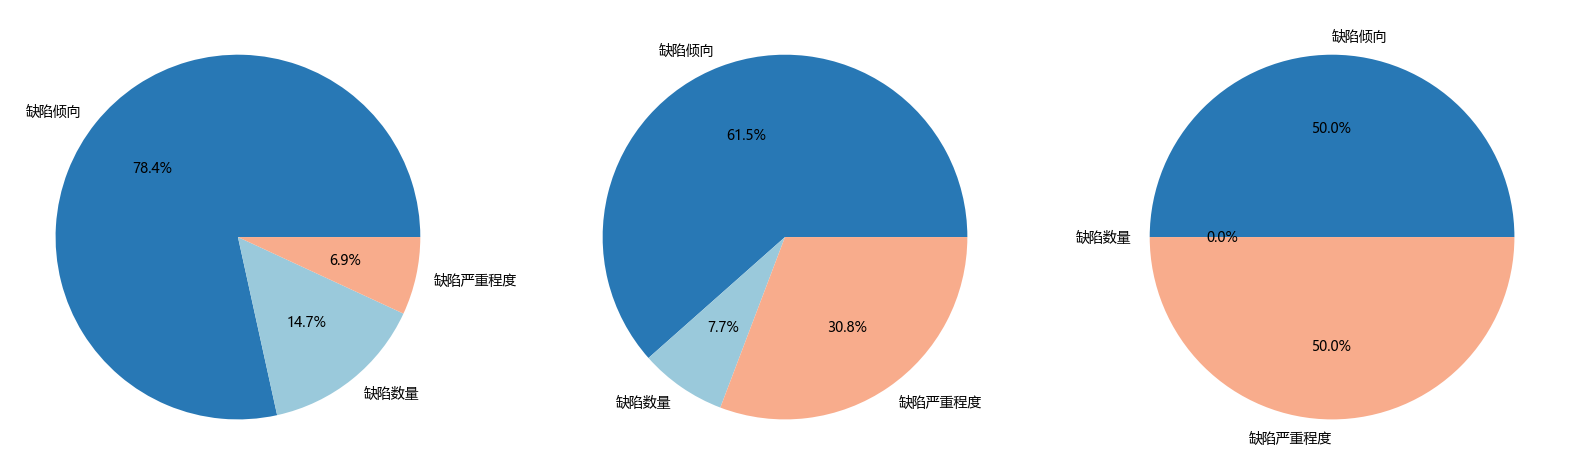

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
list_temp = []
for feature in ["metrics", "semantic", "network"]:
    p_list = []
    d_count1 = df3.loc[(df3["dependency"].str.contains("defect-prone")) & (df3["category"] == feature)]["ID"].count()
    d_count2 = df3.loc[(df3["dependency"].str.contains("defect-number")) & (df3["category"] == feature)]["ID"].count()
    d_count3 = df3.loc[(df3["dependency"].str.contains("defect-severity")) & (df3["category"] == feature)]["ID"].count()
    list_temp.append([d_count1, d_count2, d_count3])

df5 = pd.DataFrame(list_temp, index=["缺陷倾向","缺陷数量","缺陷严重程度"])
ax[0].pie(df5[0], labels=df5.index, colors=["#2878b5", "#9ac9db", "#f8ac8c"], autopct='%.1f%%')
ax[1].pie(df5[1], labels=df5.index, colors=["#2878b5", "#9ac9db", "#f8ac8c"], autopct='%.1f%%')
ax[2].pie(df5[2], labels=df5.index, colors=["#2878b5", "#9ac9db", "#f8ac8c"], autopct='%.1f%%')
# plt.savefig("评价指标-特征.jpg")

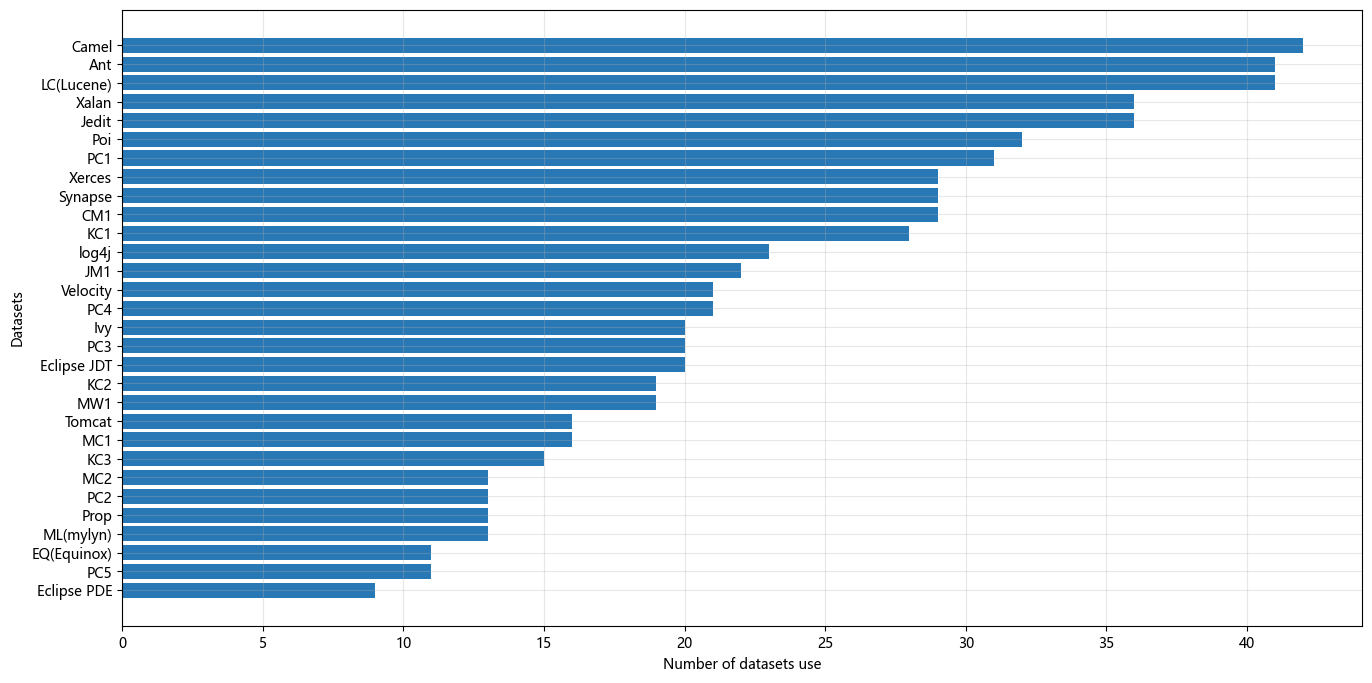

In [40]:
# 统计数据集
paper_datasets = pd.merge(pd.merge(pName, pName_datasets, on="ID"), datasets, on="dID")
d_list = []
for name in list(set(paper_datasets["dName"])):
    num = paper_datasets[paper_datasets["dName"] == name]["ID"].count()
    d_list.append([name, num])
df6 = pd.DataFrame(d_list, columns=["name", "num"])
df6 = df6.sort_values(by="num", ascending=False)
plt.figure(figsize=(16, 8), dpi=100)
plt.grid(alpha=0.3)
plt.barh(df6.iloc[:30, 0][::-1], df6.iloc[:30, 1][::-1], color="#2878b5")
plt.xlabel('Number of datasets use')
plt.ylabel('Datasets')
plt.savefig("fig7.pdf")

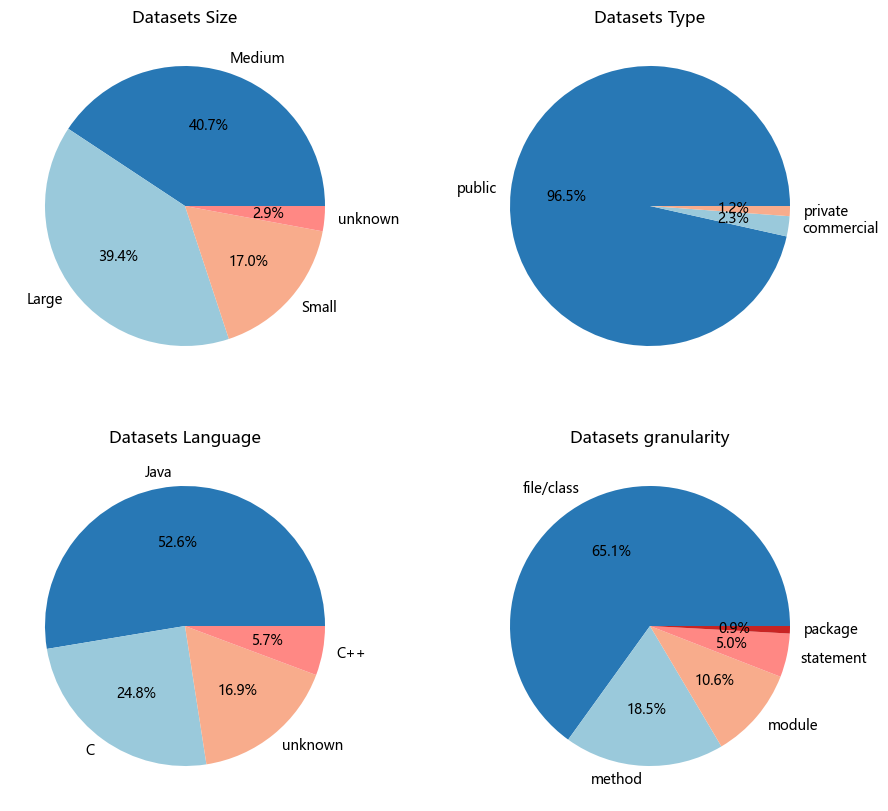

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(11, 10))
d_dict = {"file":"file/class", "C\++":"C++", "大":"Large", "中":"Medium", "小":"Small"}  # "public":"公开", "private":"私有", "commercial":"商业", "unknown":"未知", "class":"类", "method":"方法", "module":"模块", "statement":"语句", "package":"包","others":"其他"
paper_datasets = paper_datasets.replace({"class":"file", "class/statement":"file/statement"})
types = ["dSize_hand", "state", "language", "granularity"]
k=0
for i in range(0,2):
    for j in range(0,2):
        type = types[k]
    # for type, j in zip(["dSize_hand", "state", "language", "granularity"], range(0,2)):
        list_temp = []
        list_label = []
        if type == "language":
            d_list =["Java", "C\++", "C", "unknown"]
        elif type == "granularity":
            d_list = ["module", "statement", "method", "package", "file"]
        else:
            d_list = list(set(paper_datasets[type]))

        for name in d_list:
            if type == "state":
                num = datasets[datasets[type] == name]["dID"].count()
            else:
                num = paper_datasets[paper_datasets[type].str.contains(name)]["ID"].count()
            list_temp.append(num)
        d_df = pd.DataFrame(list_temp, index=d_list).sort_values(by=0, ascending=False)
        for w in d_df.index:
            if w in d_dict:
                list_label.append(d_dict[w])
            else:
                list_label.append(w)

        ax[i,j].pie(d_df[0], labels=list_label, colors=["#2878b5", "#9ac9db", "#f8ac8c", "#ff8884", "#c82423"], autopct="%.1f%%")
        k += 1
ax[0,0].set_title("Datasets Size")
ax[0,1].set_title("Datasets Type")
ax[1,0].set_title("Datasets Language")
ax[1,1].set_title("Datasets granularity")
plt.savefig("fig8.pdf")